<a href="https://colab.research.google.com/github/Vipransh-Agarwal/SMS-Spam-Detection/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import collections
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import tensorflow as tf
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [ ]:
df.columns = ["SpamHam","Tweet"]

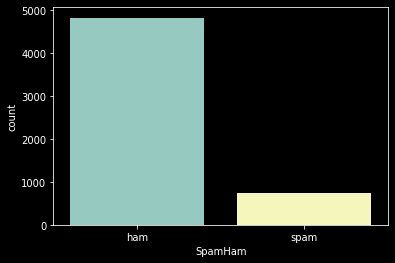

In [ ]:
sns.countplot(df["SpamHam"])

In [ ]:
def word_count_plot(data):
     # finding words along with count
     word_counter = collections.Counter([word for sentence in data for word in sentence.split()])
     most_count = word_counter.most_common(30) # 30 most common words
     # sorted data frame
     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))

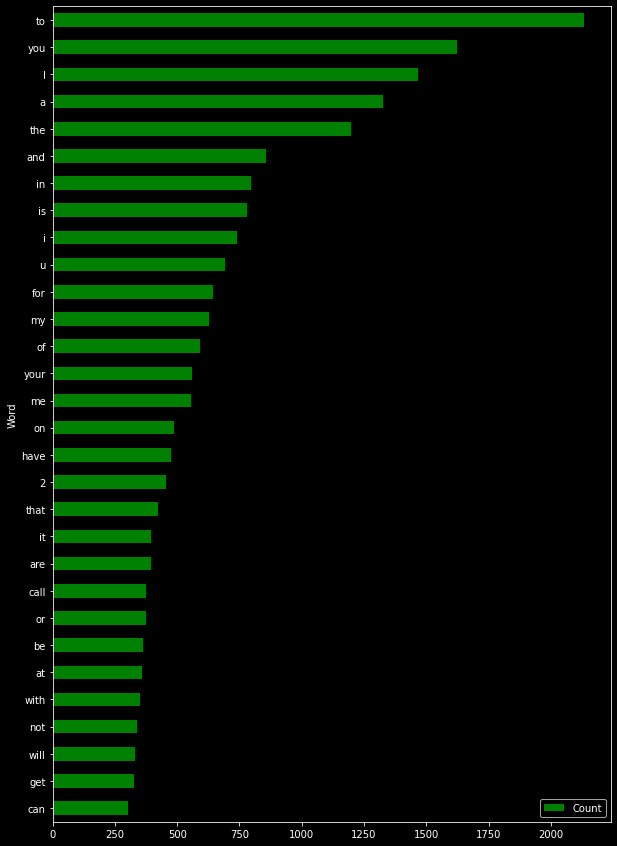

In [ ]:
word_count_plot(df["Tweet"])

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lem = WordNetLemmatizer()
def preprocessing(data):
      sms = contractions.fix(data) # converting shortened words to original (Eg:"I'm" to "I am")
      sms = sms.lower() # lower casing the sms
      sms = re.sub(r'https?://S+|www.S+', "", sms).strip() #removing url
      sms = re.sub("[^a-z ]", "", sms) # removing symbols and numbes
      sms = sms.split() #splitting
      # lemmatization and stopword removal
      sms = [lem.lemmatize(word) for word in sms if not word in set(stopwords.words("english"))]
      sms = " ".join(sms)
      return sms
X = df["Tweet"].apply(preprocessing)

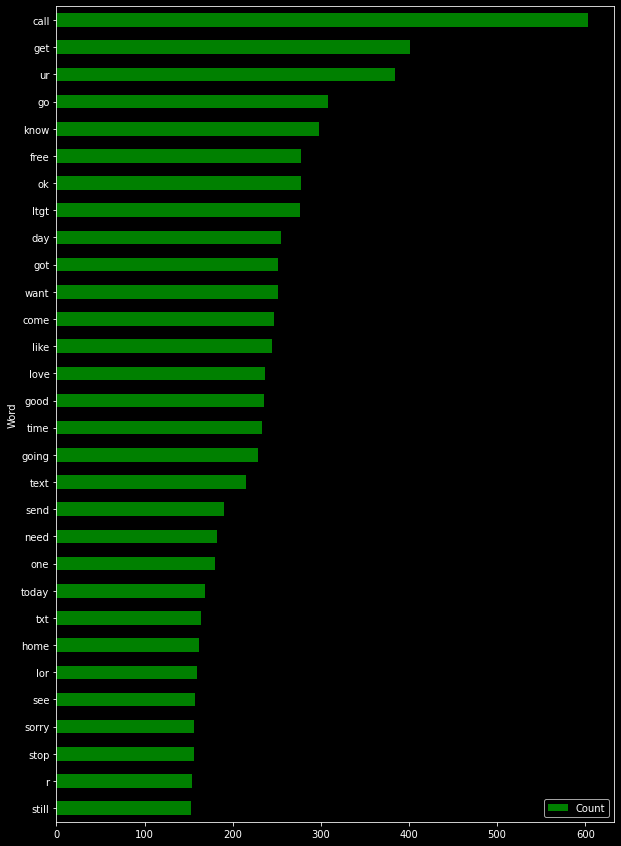

In [ ]:
word_count_plot(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
y = lb_enc.fit_transform(df["SpamHam"])

In [ ]:
tokenizer = Tokenizer() #initializing the tokenizer
tokenizer.fit_on_texts(X)# fitting on the sms data
text_to_sequence = tokenizer.texts_to_sequences(X) # creating the numerical sequence

In [ ]:
 for i in range(5):
           print("Text               : ",X[i] )
           print("Numerical Sequence : ", text_to_sequence[i])

Text               :  go jurong point crazy available bugis n great world la e buffet cine got amore wat
Numerical Sequence :  [4, 3591, 255, 555, 528, 1032, 35, 55, 236, 849, 82, 2423, 1033, 10, 3592, 69]
Text               :  ok lar joking wif oni
Numerical Sequence :  [7, 220, 1178, 330, 1545]
Text               :  free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
Numerical Sequence :  [6, 344, 588, 727, 94, 1546, 850, 482, 1547, 148, 177, 18, 1546, 221, 344, 2424, 23, 2425, 264, 2426]
Text               :  dun say early hor c already say
Numerical Sequence :  [144, 47, 256, 2427, 68, 76, 47]
Text               :  nah think go usf life around though
Numerical Sequence :  [777, 33, 4, 728, 89, 123, 345]


In [ ]:
# import io
# import json
# tokenizer_json = tokenizer.to_json()
# with io.open('/content/drive/MyDrive/tokenizer.json', 'w', encoding='utf-8') as f:
#     f.write(json.dumps(tokenizer_json))

In [ ]:
with open('/content/drive/MyDrive/tokenizer.json') as f:
    data = json.load(f)

In [ ]:
display(data)

'{"class_name": "Tokenizer", "config": {"num_words": null, "filters": "!\\"#$%&()*+,-./:;<=>?@[\\\\]^_`{|}~\\t\\n", "lower": true, "split": " ", "char_level": false, "oov_token": null, "document_count": 5572, "word_counts": "{\\"go\\": 308, \\"jurong\\": 1, \\"point\\": 33, \\"crazy\\": 15, \\"available\\": 16, \\"bugis\\": 7, \\"n\\": 144, \\"great\\": 111, \\"world\\": 36, \\"la\\": 9, \\"e\\": 85, \\"buffet\\": 2, \\"cine\\": 7, \\"got\\": 251, \\"amore\\": 1, \\"wat\\": 96, \\"ok\\": 277, \\"lar\\": 38, \\"joking\\": 6, \\"wif\\": 27, \\"oni\\": 4, \\"free\\": 278, \\"entry\\": 26, \\"wkly\\": 14, \\"comp\\": 11, \\"win\\": 77, \\"fa\\": 4, \\"cup\\": 9, \\"final\\": 18, \\"tkts\\": 4, \\"st\\": 53, \\"may\\": 46, \\"text\\": 215, \\"receive\\": 38, \\"questionstd\\": 2, \\"txt\\": 164, \\"ratetcs\\": 2, \\"apply\\": 32, \\"over\\": 2, \\"dun\\": 55, \\"say\\": 118, \\"early\\": 33, \\"hor\\": 2, \\"c\\": 97, \\"already\\": 90, \\"nah\\": 10, \\"think\\": 146, \\"usf\\": 11, \\"lif

In [ ]:
tokenizer.index_word

{1: 'call',
 2: 'get',
 3: 'ur',
 4: 'go',
 5: 'know',
 6: 'free',
 7: 'ok',
 8: 'ltgt',
 9: 'day',
 10: 'got',
 11: 'want',
 12: 'come',
 13: 'like',
 14: 'love',
 15: 'good',
 16: 'time',
 17: 'going',
 18: 'text',
 19: 'send',
 20: 'need',
 21: 'one',
 22: 'today',
 23: 'txt',
 24: 'home',
 25: 'lor',
 26: 'see',
 27: 'sorry',
 28: 'stop',
 29: 'r',
 30: 'still',
 31: 'back',
 32: 'mobile',
 33: 'think',
 34: 'reply',
 35: 'n',
 36: 'take',
 37: 'tell',
 38: 'phone',
 39: 'new',
 40: 'week',
 41: 'later',
 42: 'da',
 43: 'hi',
 44: 'please',
 45: 'cannot',
 46: 'make',
 47: 'say',
 48: 'night',
 49: 'claim',
 50: 'well',
 51: 'thing',
 52: 'much',
 53: 'dear',
 54: 'oh',
 55: 'great',
 56: 'hey',
 57: 'pls',
 58: 'would',
 59: 'give',
 60: 'number',
 61: 'happy',
 62: 'friend',
 63: 'work',
 64: 'hope',
 65: 'message',
 66: 'u',
 67: 'way',
 68: 'c',
 69: 'wat',
 70: 'msg',
 71: 'prize',
 72: 'right',
 73: 'yes',
 74: 'let',
 75: 'min',
 76: 'already',
 77: 'tomorrow',
 78: 'ask',
 

In [ ]:
max_length_sequence = max([len(i) for i in text_to_sequence])
 # finding the length of largest sequence
padded_sms_sequence = pad_sequences(text_to_sequence, maxlen=max_length_sequence, 
                                    padding = "pre") 
padded_sms_sequence

array([[   0,    0,    0, ...,   10, 3592,   69],
       [   0,    0,    0, ..., 1178,  330, 1545],
       [   0,    0,    0, ..., 2425,  264, 2426],
       ...,
       [   0,    0,    0, ..., 1028, 7833, 3589],
       [   0,    0,    0, ...,  792,   66,    6],
       [   0,    0,    0, ..., 2158,  367,  146]], dtype=int32)

In [ ]:
TOT_SIZE = len(tokenizer.word_index)+1
def create_model():
    
      lstm_model = Sequential()
      lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_length_sequence))
      lstm_model.add(LSTM(100))
      lstm_model.add(Dropout(0.4))
      lstm_model.add(Dense(20, activation="relu"))
      lstm_model.add(Dropout(0.3))
      lstm_model.add(Dense(1, activation = "sigmoid"))
      return lstm_model
lstm_model = create_model()
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 32)            250720    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 305,961
Trainable params: 305,961
Non-trai

In [ ]:
lstm_model.fit(padded_sms_sequence, y, epochs = 5, validation_split=0.2, batch_size=16)

Epoch 1/5
279/279 [==============================] - 8s 10ms/step - loss: 0.1860 - accuracy: 0.9446 - val_loss: 0.0678 - val_accuracy: 0.9758
Epoch 2/5
279/279 [==============================] - 2s 8ms/step - loss: 0.0393 - accuracy: 0.9908 - val_loss: 0.0589 - val_accuracy: 0.9821
Epoch 3/5
279/279 [==============================] - 2s 8ms/step - loss: 0.0134 - accuracy: 0.9975 - val_loss: 0.0701 - val_accuracy: 0.9848
Epoch 4/5
279/279 [==============================] - 2s 8ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0985 - val_accuracy: 0.9749
Epoch 5/5
279/279 [==============================] - 2s 8ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.1137 - val_accuracy: 0.9848
